   Age  Experience  Rank  Nationality  Go
0   36          13     4            0   0
1   56           5     7            1   0
2   67           6     3            2   0
3   24          11     5            1   1
4   59           3     7            2   0
5   47           8     4            2   1
6   65          14     7            1   1
7   74           5     8            0   0
8   46          10     2            0   1


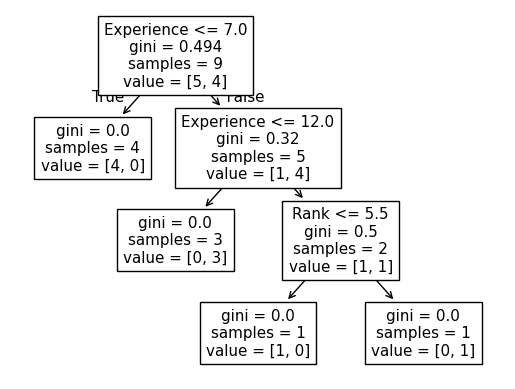

In [10]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("TempData.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

print(df)

